# 1) Introducción

El dataset con el que se trabajará se llama “Sephora Products and Skincare Reviews” y ha sido descargado de la página Kaggle.

 Link: https://www.kaggle.com/datasets/nadyinky/sephora-products-and-skincare-reviews/data?select=product_info.csv

Consiste en un análisis de productos vendidos por la página web de la cadena de cosméticos “Sephora” en Estados Unidos.
El dataset contiene información sobre más de 8000 productos de belleza de diversas categorías, marcas y tipos.

Se ha buscado analizar mediante uso de gráficos univariados y bivariados en primer instancia lo siguiente:

*Categorías de productos más populares

*Distribución de las valoraciones

*Precio promedio de los productos por categoría

*Qué tipo de productos tienen las mejores valoraciones

Siendo mi primer experiencia en Data Science, intentaré predecir idealmente el precio del producto considerando los factores que se mencionaron anteriormente. Considerar la influencia del rating y las categorías como poder así incorporar la composición del producto, la exclusividad en la tienda y cantidad de "me gustas".


# 2) Descripción del Dataset Elegido:

Cuenta con 27 columnas, conteniendo 8494 filas. A continuación se expone el detalle de cada una de las columnas e información sobre su contenido:

product_id: Código del producto en la página web

product_name: Nombre completo del producto

brand_id: Código de la marca del producto en la página Web

brand_name: Nombre completo de la marca del producto

loves_count: Cantidad de personas que han indicado que el producto se incluye en lista de "favoritos" en la página web.

rating: Rating promedio basado en revisiones de los usuarios

reviews: Cantidad de revisiones de los usuarios

size: Tamaño del producto en onzas, miligramos, gramos, paquetes u otros en función del producto

variation_type: Variante del producto. Ejemplo: tamaño, color, etc.

variation_value: Valor específico que diferencia la variante.Ejemplo: modificación en tamaño, color de la variante, etc.

variation_desc: Descripción de la variante.

ingredients: Lista de los ingredientes que contiene el producto. Ejemplo: agua (water), glicerina (Glycerin), etc.

price_usd: Precio del producto en dólares (USD)

value_price_usd: Potencial costo de ahorro del producto que figura en la página web.

sale_price_usd: Precio en descuento del producto en dólares (USD)

limited_edition: Indica si el producto es edición limitada (0-Falso, 1-Verdadero)

new: Indica si el producto es nuevo (0- Falso, 1- Verdadero)

online_only: Indica si el producto se vende unicamente online (0-Falso, 1-Verdadero)

out_of_stock: Indica si el producto está en stock (0-Falso, 1-verdadero)
exclusive: Indica si el producto se vende exclusivamente en Sephora (0-Falso, 1-Verdadero)
highlights: Lista de etiquetas que representan al producto. Ejemplo: Vegano, Acabado matte, etc.

primary_category: Primer categoría que figura en la sección de "breadcrumb" (estructura dentro de la web)

secondary_category: Segunda categoría que figura en la sección de "breadcrumb" (estructura dentro de la web)

tertiary_category:Tercer categoría que figura en la sección de "breadcrumb" (estructura dentro de la web)

child_count:Cantidad de variantes del producto

child_max_price: Precio máximo de las variantes.

child_min_price: Precio mínimo de las variantes.

# 3) Hipotesis: Descifrando el código del éxito en la cosmética - Un análisis para la toma de decisiones informadas
El industria de la cosmética ha crecido exponencialmente en estos últimos años. Es fundamental considerar todos los factores que influyen directamente. EN este caso se cree que las categorias, la exclusividad, las marcas y el rating son factores determinantes que impactan en el precio de un producto y ayudan a comprender el mercado y la demanda dado que un producto exclusivo o de mejor rating podria tener precio mas elevado al ser mas requerido o anticipado.

Al analizar qué características y tipos de productos de maquillaje tienen exito en el mercado, se obtiene una visión mas global lo cual mejora estrategias de marketing.

Un modelo predictivo preciso puede ser una herramienta invaluable para empresas e inversores, permitiéndoles anticipar la demanda, optimizar estrategias y tomar decisiones informadas que impulsen el crecimiento.

Como objetivo buscamos predecir las ventas en dolares utilizando un algoritmo de regresión tomando en cuenta los factores que mencionamos.

------------------------------------------------------------------------------------------------------------------------------

# 4) DESARROLLO DEL TRABAJO

## A) Importo librerías y datos para realizar el Análisis Exploratorio de Datos

In [1017]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor as KNN
from xgboost import XGBRegressor

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [1018]:
#En caso de no usar Google Colab, usar el siguiente código para importar el dataset:
#maqui_csv = "sephora.csv"
#maqui = pd.read_csv(maqui_csv, sep=",")
#maqui.head()

In [1019]:
# En este caso decidí usar Google Colab e importar desde Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1020]:
#%cd /content/drive/MyDrive/Proyecto_ParteIII_CANAVES
%cd /content/drive/MyDrive/Proyecto_ParteIII_+CANAVES/
maqui= pd.read_csv("sephora.csv", sep= ",")

/content/drive/MyDrive/Proyecto_ParteIII_+CANAVES


In [1021]:
#Una vez importado, muestro los datos de cabecera
maqui.head()

,product_id,product_name,brand_id,brand_name,loves_count,rating,reviews,size,variation_type,variation_value,...,online_only,out_of_stock,sephora_exclusive,highlights,primary_category,secondary_category,tertiary_category,child_count,child_max_price,child_min_price
0,P473671,Fragrance Discovery Set,6342,19-69,6320,3.6364,11.0,NaN,NaN,NaN,...,1,0,0,"['Unisex/ Genderless Scent', 'Warm &Spicy Scen...",Fragrance,Value & Gift Sets,Perfume Gift Sets,0,NaN,NaN
1,P473668,La Habana Eau de Parfum,6342,19-69,3827,4.1538,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,85.0,30.0
2,P473662,Rainbow Bar Eau de Parfum,6342,19-69,3253,4.2500,16.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0
3,P473660,Kasbah Eau de Parfum,6342,19-69,3018,4.4762,21.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0
4,P473658,Purple Haze Eau de Parfum,6342,19-69,2691,3.2308,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0


In [1022]:
#Aquí observo la cantidad de filas y columnas
maqui.shape

(8494, 27)

In [1023]:
#Información general de los datos.
maqui.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8494 entries, 0 to 8493
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   product_id          8494 non-null   object 
 1   product_name        8494 non-null   object 
 2   brand_id            8494 non-null   int64  
 3   brand_name          8494 non-null   object 
 4   loves_count         8494 non-null   int64  
 5   rating              8216 non-null   float64
 6   reviews             8216 non-null   float64
 7   size                6863 non-null   object 
 8   variation_type      7050 non-null   object 
 9   variation_value     6896 non-null   object 
 10  variation_desc      1250 non-null   object 
 11  ingredients         7549 non-null   object 
 12  price_usd           8494 non-null   float64
 13  value_price_usd     451 non-null    float64
 14  sale_price_usd      270 non-null    float64
 15  limited_edition     8494 non-null   int64  
 16  new   

#B) Limpieza de valores nulos

In [1024]:
#Al tomar la columna de "rating" tengo algunos valores nulos que busco reemplazar
imputadormedia = SimpleImputer(missing_values=np.nan, strategy='mean')

#Reshape de las columnas en una variable
reviews_mean = maqui["reviews"].values.reshape(-1,1)
rating_mean = maqui["rating"].values.reshape(-1,1)

#Traigo el imputador y transformo
reviews_imputada = imputadormedia.fit_transform(reviews_mean)
rating_imputada = imputadormedia.fit_transform(rating_mean)

#Lo asigno a su columna

maqui["reviews"] = reviews_imputada
maqui["rating"] = rating_imputada

In [1025]:
#Para reemplazar valores nulos de tipo categorico, busca reemplazar con el valor "otro" cuando son object.
maqui["size"].fillna("Otro", inplace=True)
maqui["variation_type"].fillna("Otro", inplace=True)
maqui["variation_value"].fillna("Otro", inplace=True)
maqui["ingredients"].fillna("Otro", inplace=True)
maqui["highlights"].fillna("Otro", inplace=True)

In [1026]:
maqui.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8494 entries, 0 to 8493
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   product_id          8494 non-null   object 
 1   product_name        8494 non-null   object 
 2   brand_id            8494 non-null   int64  
 3   brand_name          8494 non-null   object 
 4   loves_count         8494 non-null   int64  
 5   rating              8494 non-null   float64
 6   reviews             8494 non-null   float64
 7   size                8494 non-null   object 
 8   variation_type      8494 non-null   object 
 9   variation_value     8494 non-null   object 
 10  variation_desc      1250 non-null   object 
 11  ingredients         8494 non-null   object 
 12  price_usd           8494 non-null   float64
 13  value_price_usd     451 non-null    float64
 14  sale_price_usd      270 non-null    float64
 15  limited_edition     8494 non-null   int64  
 16  new   

# C) Exploración de datos mediante el uso de gráficos
## Información sobre las categorías primarias de los productos:

In [1027]:
#Armo un dataframe donde se contenta la cantidad de productos organizados por categoría
tipoproducto= maqui["primary_category"].value_counts()
print(tipoproducto)

primary_category
Skincare           2420
Makeup             2369
Hair               1464
Fragrance          1432
Bath & Body         405
Mini Size           288
Men                  60
Tools & Brushes      52
Gifts                 4
Name: count, dtype: int64


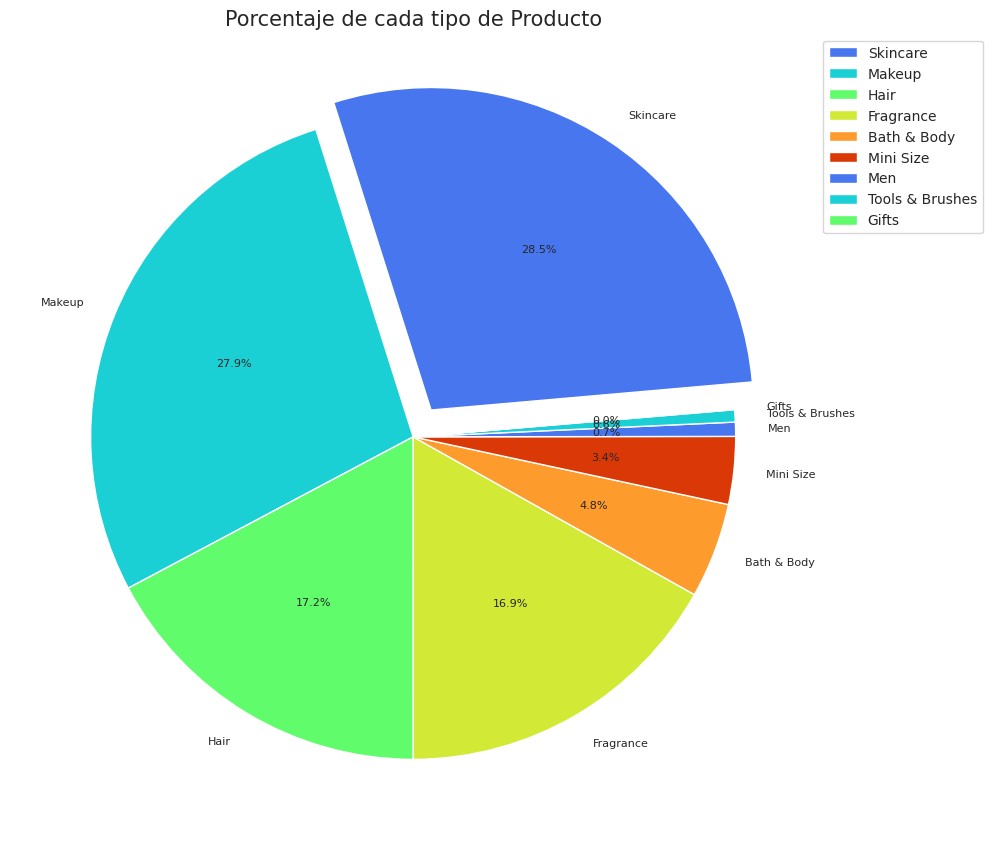

In [1028]:
#Armo un gráfico de pastel donde se muestra el porcentaje de cada una de las categorías
#Primero le doy formato a mi gráfico
plt.figure(figsize=(10, 10))
plt.title("Porcentaje de cada tipo de Producto", fontsize=15)
plt.pie(tipoproducto, labels=tipoproducto.index, textprops={'fontsize':8}, colors=sns.color_palette("turbo"), startangle=5, autopct="%1.1f%%", explode=[0.1, 0, 0, 0, 0, 0, 0, 0, 0])

#Agrego una leyenda. Por defecto lo coloca sobre la figura, tapando informacion, por ello se modifico su ubicación
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.tight_layout()
plt.show()

El mayor porcentaje de productos correspone a la categoría "Skincare" que, como mencionamos en el glosario introductorio, significa Cuidado de la Piel.

##- Información relacionada a las valoraciones/puntuaciones de los productos

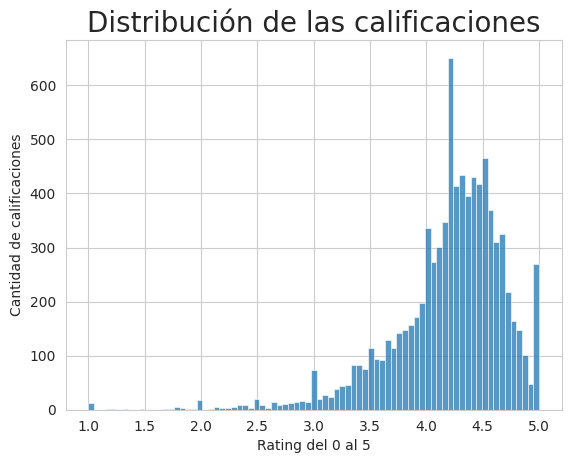

In [1029]:
# Creo un histograma considerando el rating
sns.histplot(maqui["rating"])

# Agrego títulos y etiquetas
plt.title("Distribución de las calificaciones", fontsize=20)
plt.ylabel("Cantidad de calificaciones")
plt.xlabel("Rating del 0 al 5")
plt.show()

Podemos observar que la mayoría de las valoraciones son positivas.

A continuación agrupo rating por cada una de las categorías de los pruductos:

In [1030]:
#Agrupo por categoría y saco la media del rating.
agrupaditos = maqui.groupby("primary_category")["rating"].mean()
print(agrupaditos)

primary_category
Bath & Body        4.195003
Fragrance          4.228527
Gifts              4.563450
Hair               4.200897
Makeup             4.147670
Men                4.499817
Mini Size          4.014845
Skincare           4.227910
Tools & Brushes    4.268499
Name: rating, dtype: float64


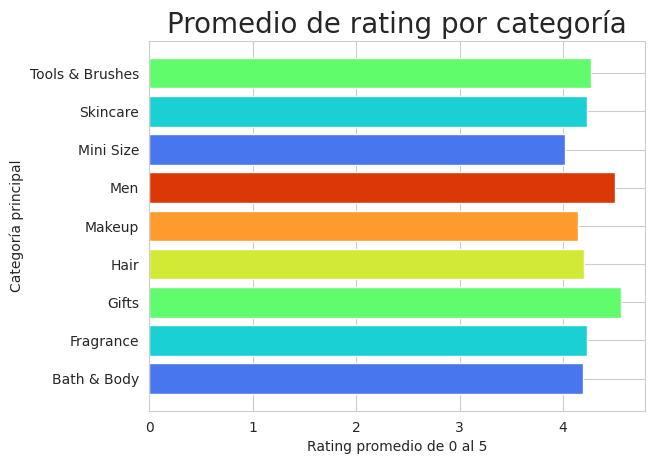

In [1031]:
#Armo gráfico de barras horizontales donde se muestran categorías y rating promedio
promedio_rating = plt.barh(agrupaditos.index, agrupaditos.values, color=sns.color_palette("turbo"))


plt.title("Promedio de rating por categoría", fontsize=20)
plt.ylabel("Categoría principal")
plt.xlabel("Rating promedio de 0 al 5")
plt.show()

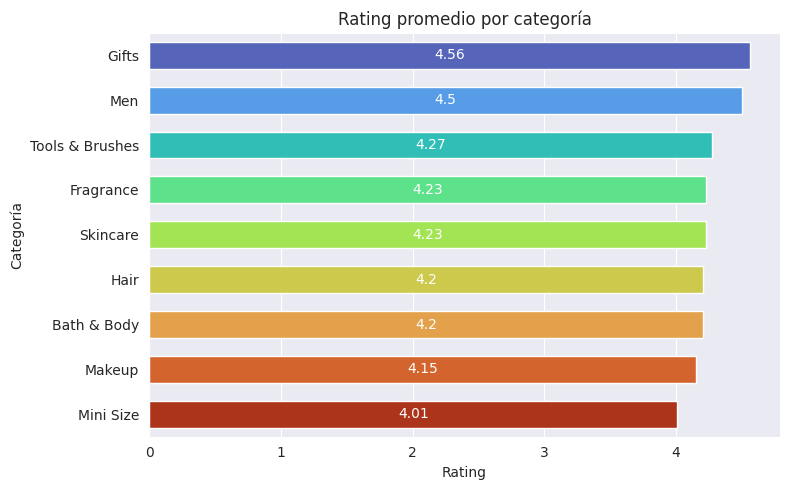

In [1032]:
plt.figure(figsize=(8,5))
sns.set_style("darkgrid")

agrupaditos_valores = agrupaditos.sort_values(ascending=False)

promedio_rating_2 = sns.barplot(y=agrupaditos_valores.index, x=agrupaditos_valores.round(2), hue=agrupaditos_valores.index, palette='turbo',width=0.6)
promedio_rating_2.set(xlabel="Rating", ylabel="Categoría", title="Rating promedio por categoría")

for container in promedio_rating_2.containers: #Para cada valor de las columnas
  promedio_rating_2.bar_label(container, fontsize=10,label_type='center', color='white') #mostralo, con un tamaño de 8, centrado y de color blanco

plt.tight_layout()
plt.show()

La mayoría de las categorías tienen valoraciones positivas similares. Las categorías que se destacan son las de "men" y "gifts".

## - Costos de los productos:

In [1033]:
#Creo una agrupación de categorías por dinero y lo describo. Aqí se ve un outlier en la categoría "skincare"
agrupacionplatita = maqui.groupby("primary_category")["price_usd"].describe()
agrupacionplatita

,count,mean,std,min,25%,50%,75%,max
primary_category,,,,,,,,
Bath & Body,405.0,42.233333,28.733635,3.00,25.0,38.0,50.00,300.0
Fragrance,1432.0,87.262570,63.306820,10.00,34.0,80.0,123.00,395.0
Gifts,4.0,50.000000,0.000000,50.00,50.0,50.0,50.00,50.0
Hair,1464.0,42.786701,39.865903,5.00,25.0,32.0,45.00,399.0
Makeup,2369.0,32.757995,18.659477,3.00,22.0,29.0,39.00,320.0
Men,60.0,33.200000,14.945154,10.00,24.0,30.0,37.25,104.0
Mini Size,288.0,21.397569,13.739643,3.00,15.0,18.0,24.00,165.0
Skincare,2420.0,60.512500,69.749693,3.00,28.0,44.0,70.00,1900.0
Tools & Brushes,52.0,31.922115,44.747305,4.95,12.0,19.5,25.25,249.0


Se observa que hay un valor máximo único en la categoría "skincare" que es un outlier muy superior al resto de los precios. Por ello es que se reemplazara por la mediana para hacer los gráficos y tener una vista mas pareja y organizada de la información.

In [1034]:
#muestro el precio máximo
preciomax = maqui["price_usd"].max()
preciomax

1900.0

In [1035]:
# Busco el valor máximo en la columna
preciomax = maqui["price_usd"].max()

# Calculo la mediana de la columna
mediana = maqui["price_usd"].median()

# Reemplazo el valor máximo por la mediana
maqui.loc[maqui["price_usd"] == preciomax, "price_usd"] = mediana

maqui.describe()

,brand_id,loves_count,rating,reviews,price_usd,value_price_usd,sale_price_usd,limited_edition,new,online_only,out_of_stock,sephora_exclusive,child_count,child_max_price,child_min_price
count,8494.000000,8.494000e+03,8494.000000,8494.000000,8494.000000,451.000000,270.000000,8494.000000,8494.000000,8494.000000,8494.000000,8494.000000,8494.000000,2754.000000,2754.000000
mean,5422.440546,2.917957e+04,4.194513,448.545521,51.436028,91.168537,20.207889,0.070285,0.071698,0.219096,0.073699,0.279374,1.631622,53.792023,39.665802
std,1709.595957,6.609212e+04,0.508168,1083.796966,49.780651,79.195631,24.327352,0.255642,0.258002,0.413658,0.261296,0.448718,5.379470,58.765894,38.685720
min,1063.000000,0.000000e+00,1.000000,1.000000,3.000000,0.000000,1.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,3.000000
25%,5333.000000,3.758000e+03,4.000000,28.000000,25.000000,45.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,19.000000
50%,6157.500000,9.880000e+03,4.270950,136.000000,35.000000,67.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,32.000000,28.000000
75%,6328.000000,2.684125e+04,4.522500,448.545521,58.000000,108.500000,25.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,59.000000,42.000000
max,8020.000000,1.401068e+06,5.000000,21281.000000,495.000000,617.000000,320.000000,1.000000,1.000000,1.000000,1.000000,1.000000,105.000000,570.000000,400.000000


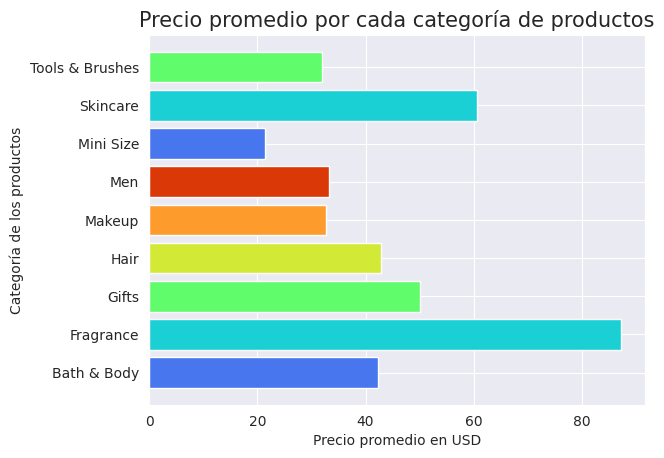

In [1036]:
#Se presenta un gráfico de barras con el precio promedio de los productos dentro de cada categoría
plt.barh(agrupacionplatita.index, agrupacionplatita["mean"], color=sns.color_palette("turbo")) #precio promedio por cada producto
plt.title("Precio promedio por cada categoría de productos", fontsize=15)
plt.ylabel("Categoría de los productos")
plt.xlabel("Precio promedio en USD")
plt.show()

Se observa que las fragancias y cuidado de la piel tendrían los mayores costos, miuentras que los "mini size" , maquillaje y "men" son aquellas que tienen menores precios.

----------------------------------------------------

para visualizar mejor la información de costos se armó un boxplot por categoría.

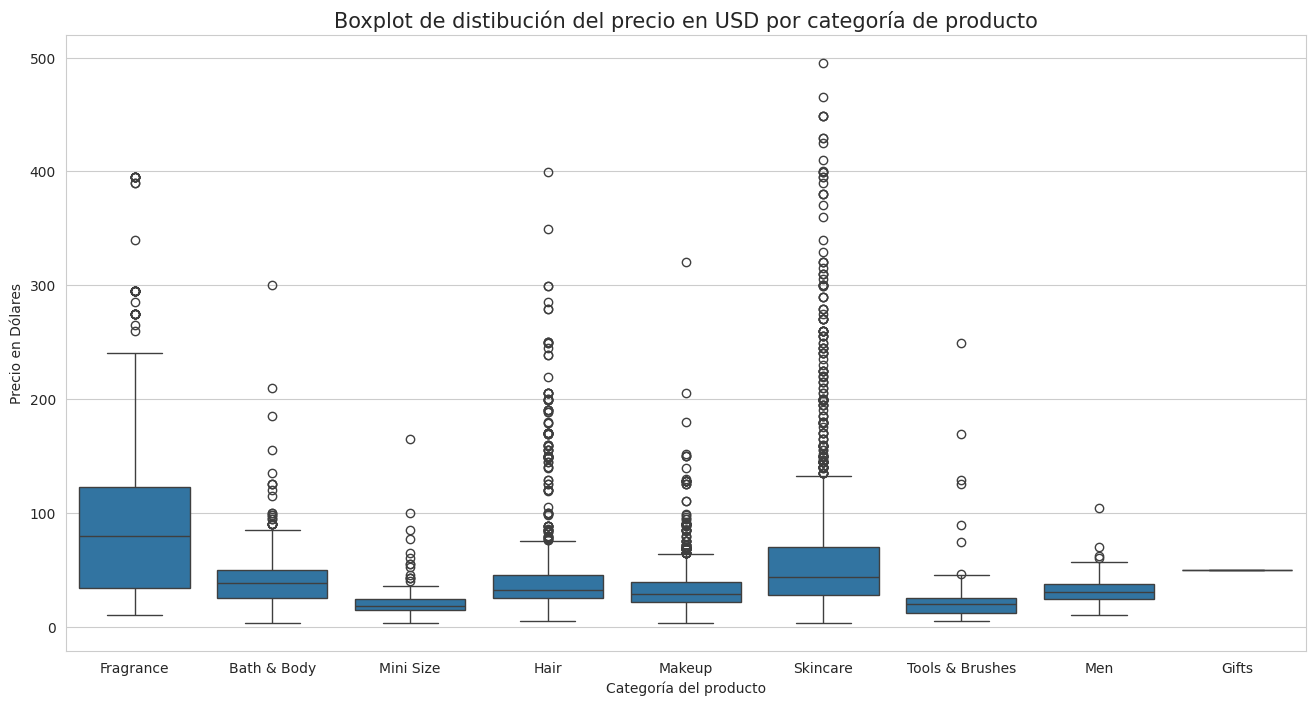

In [1037]:
#defino un estilo de grafico desde librería seaborn y el tamaño de la figura
sns.set_style("whitegrid")
plt.figure(figsize=(16,8))
#Creo un gráfico Boxplot tomando las categorías principales y el precio en USD.
sns.boxplot(x='primary_category', y='price_usd', data=maqui,)
plt.title("Boxplot de distibución del precio en USD por categoría de producto", fontsize=15)
plt.ylabel("Precio en Dólares")
plt.xlabel("Categoría del producto")
plt.show()

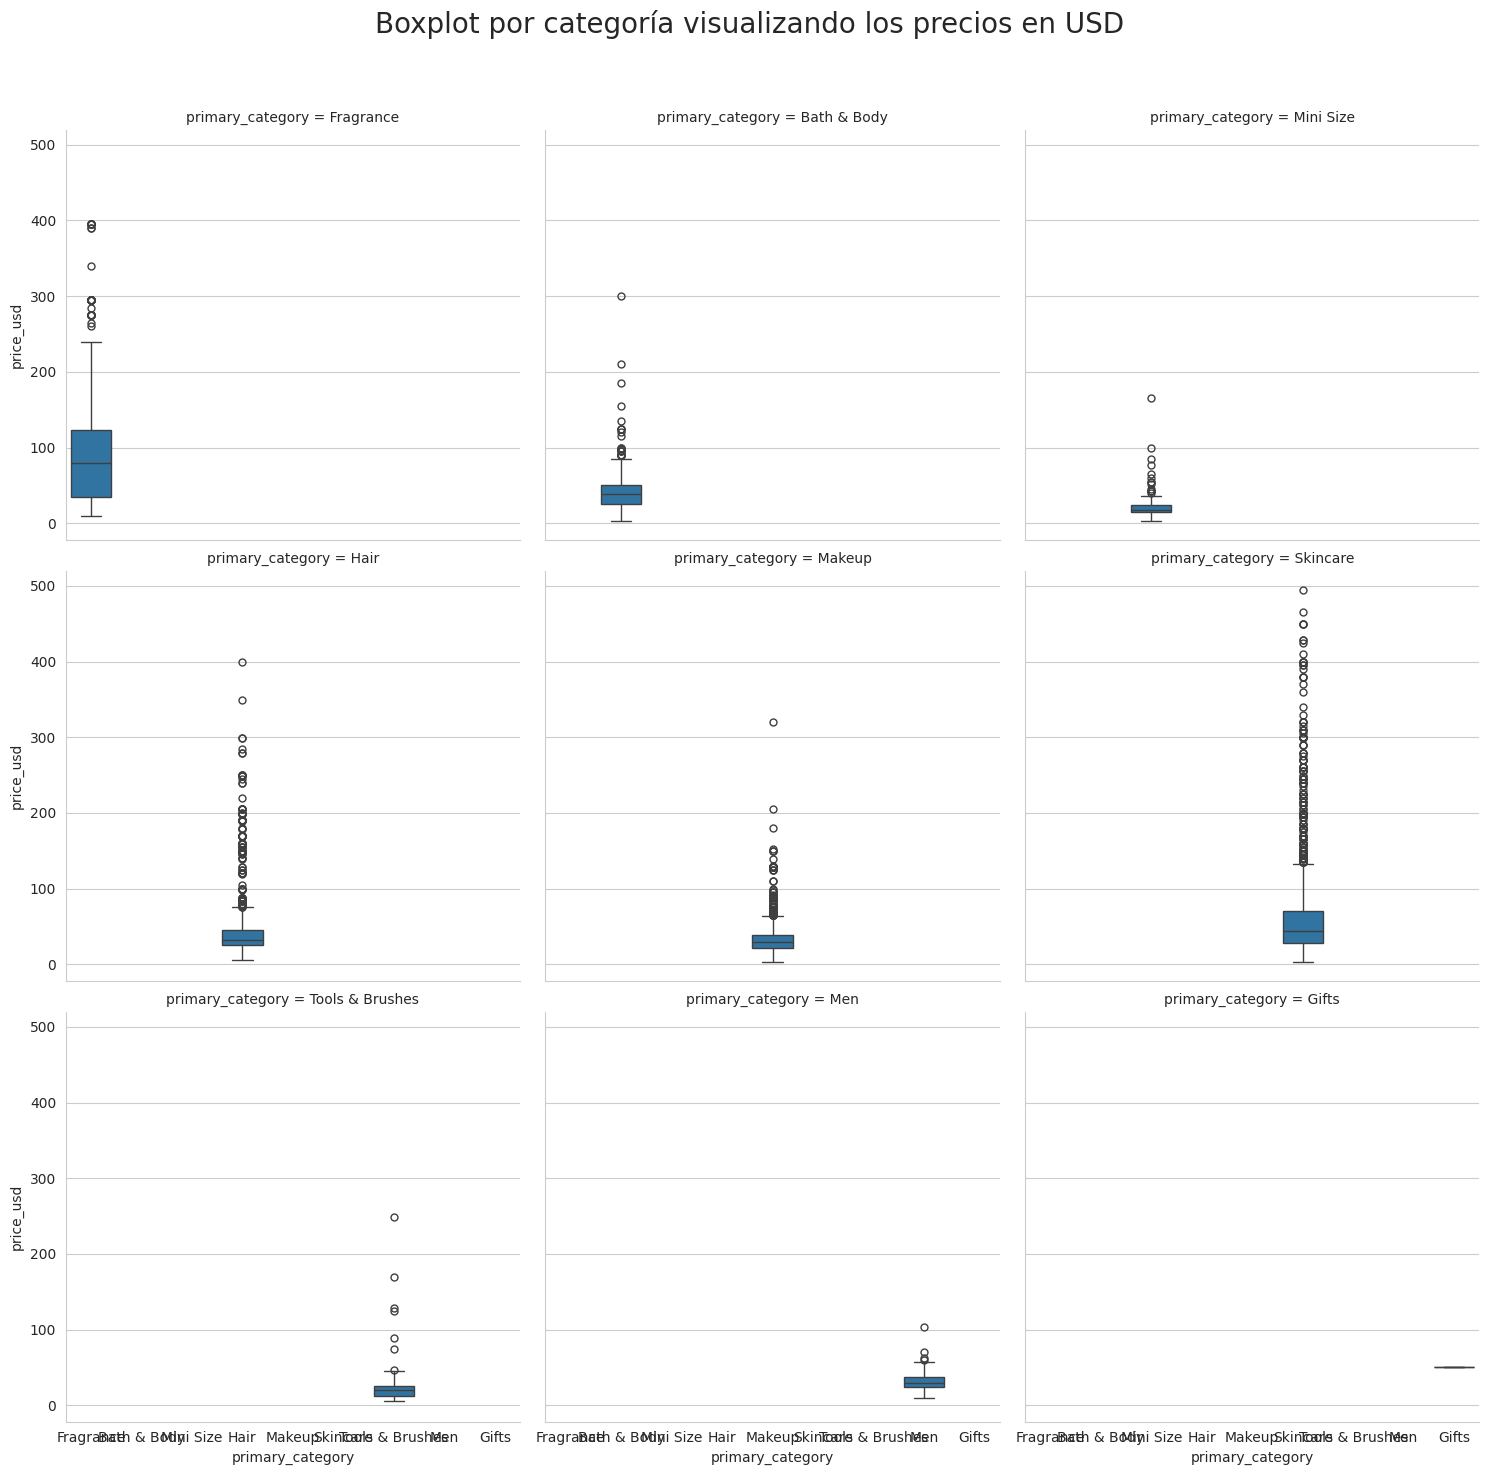

In [1038]:
#Se muestra un gráfico de tipo Catplot para poder ver individualmente cada uno de los graficos discriminado por categoría
catplot= sns.catplot( kind = "box", x = "primary_category", y = "price_usd", col = "primary_category", data = maqui, col_wrap=3 )
#agrego título y luego lo acomodo la posición
catplot.fig.suptitle("Boxplot por categoría visualizando los precios en USD", fontsize=20)
catplot.fig.subplots_adjust(top=0.90)
plt.show()

## - Relación entre precio y las calificaciones

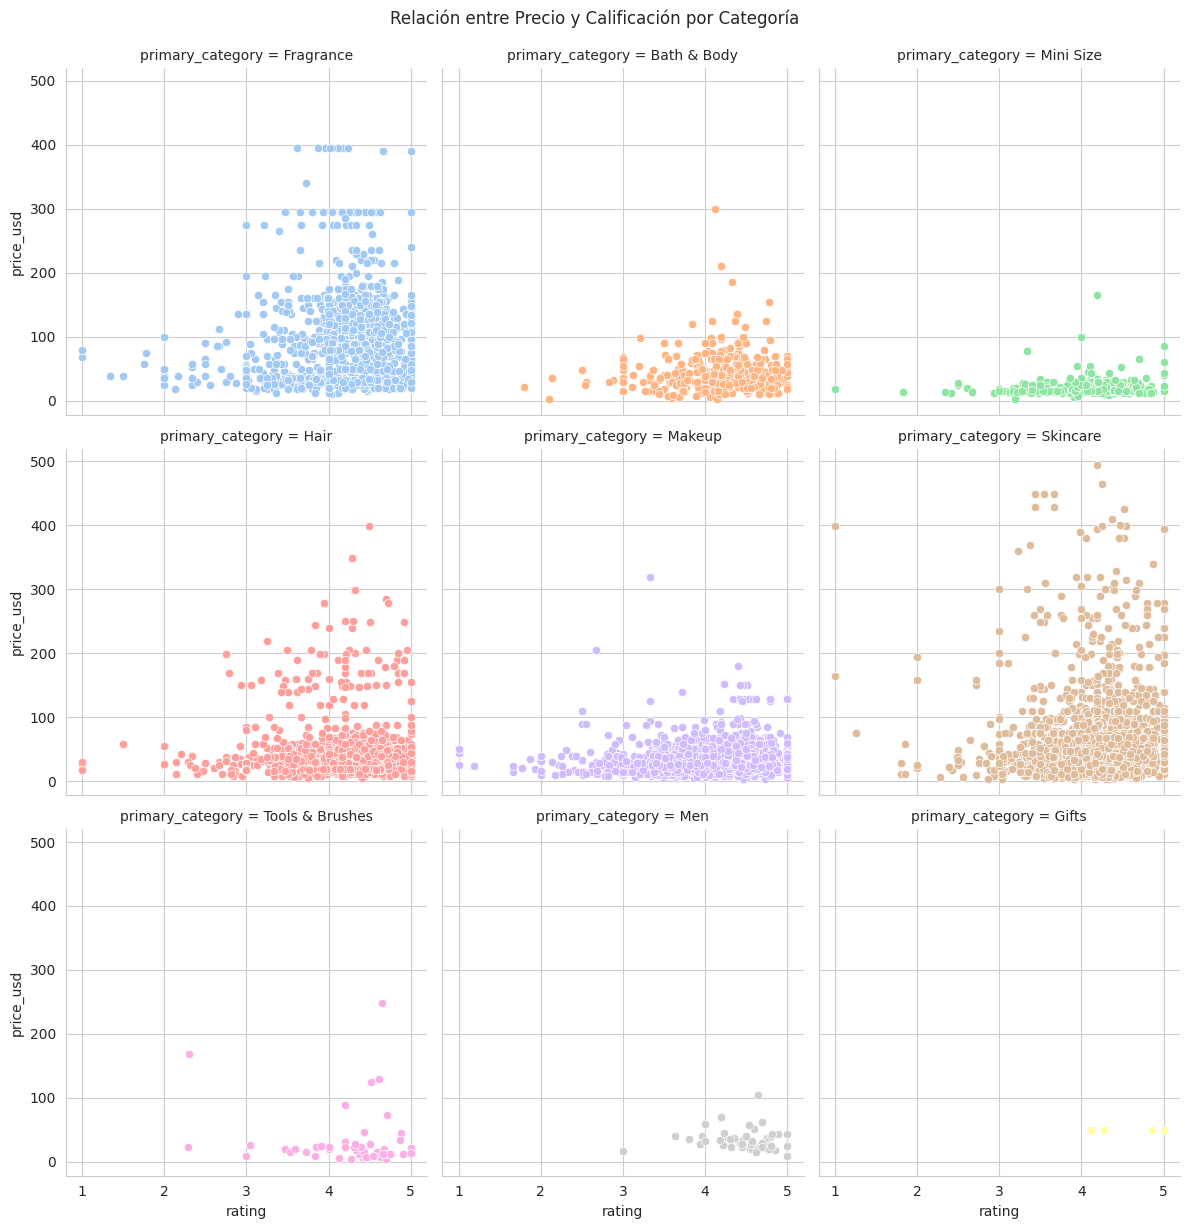

In [1039]:
# Creo un gráfico FacetGrid
facet = sns.FacetGrid(maqui, col="primary_category", col_wrap=3, height=4, hue="primary_category", palette="pastel")

# Mapa de dispersión para la relación entre precio y calificación en cada categoría
facet.map(sns.scatterplot, 'rating', 'price_usd')

# Añadir título al gráfico principal
facet.fig.suptitle('Relación entre Precio y Calificación por Categoría', y=1.02)

# Mostrar el gráfico
plt.show()

Se puede deducir que en la mayoría de las categorias, un menor precio impacta en una valoración más positiva.

## - Relación entre "likes" (loves_count) y el rating

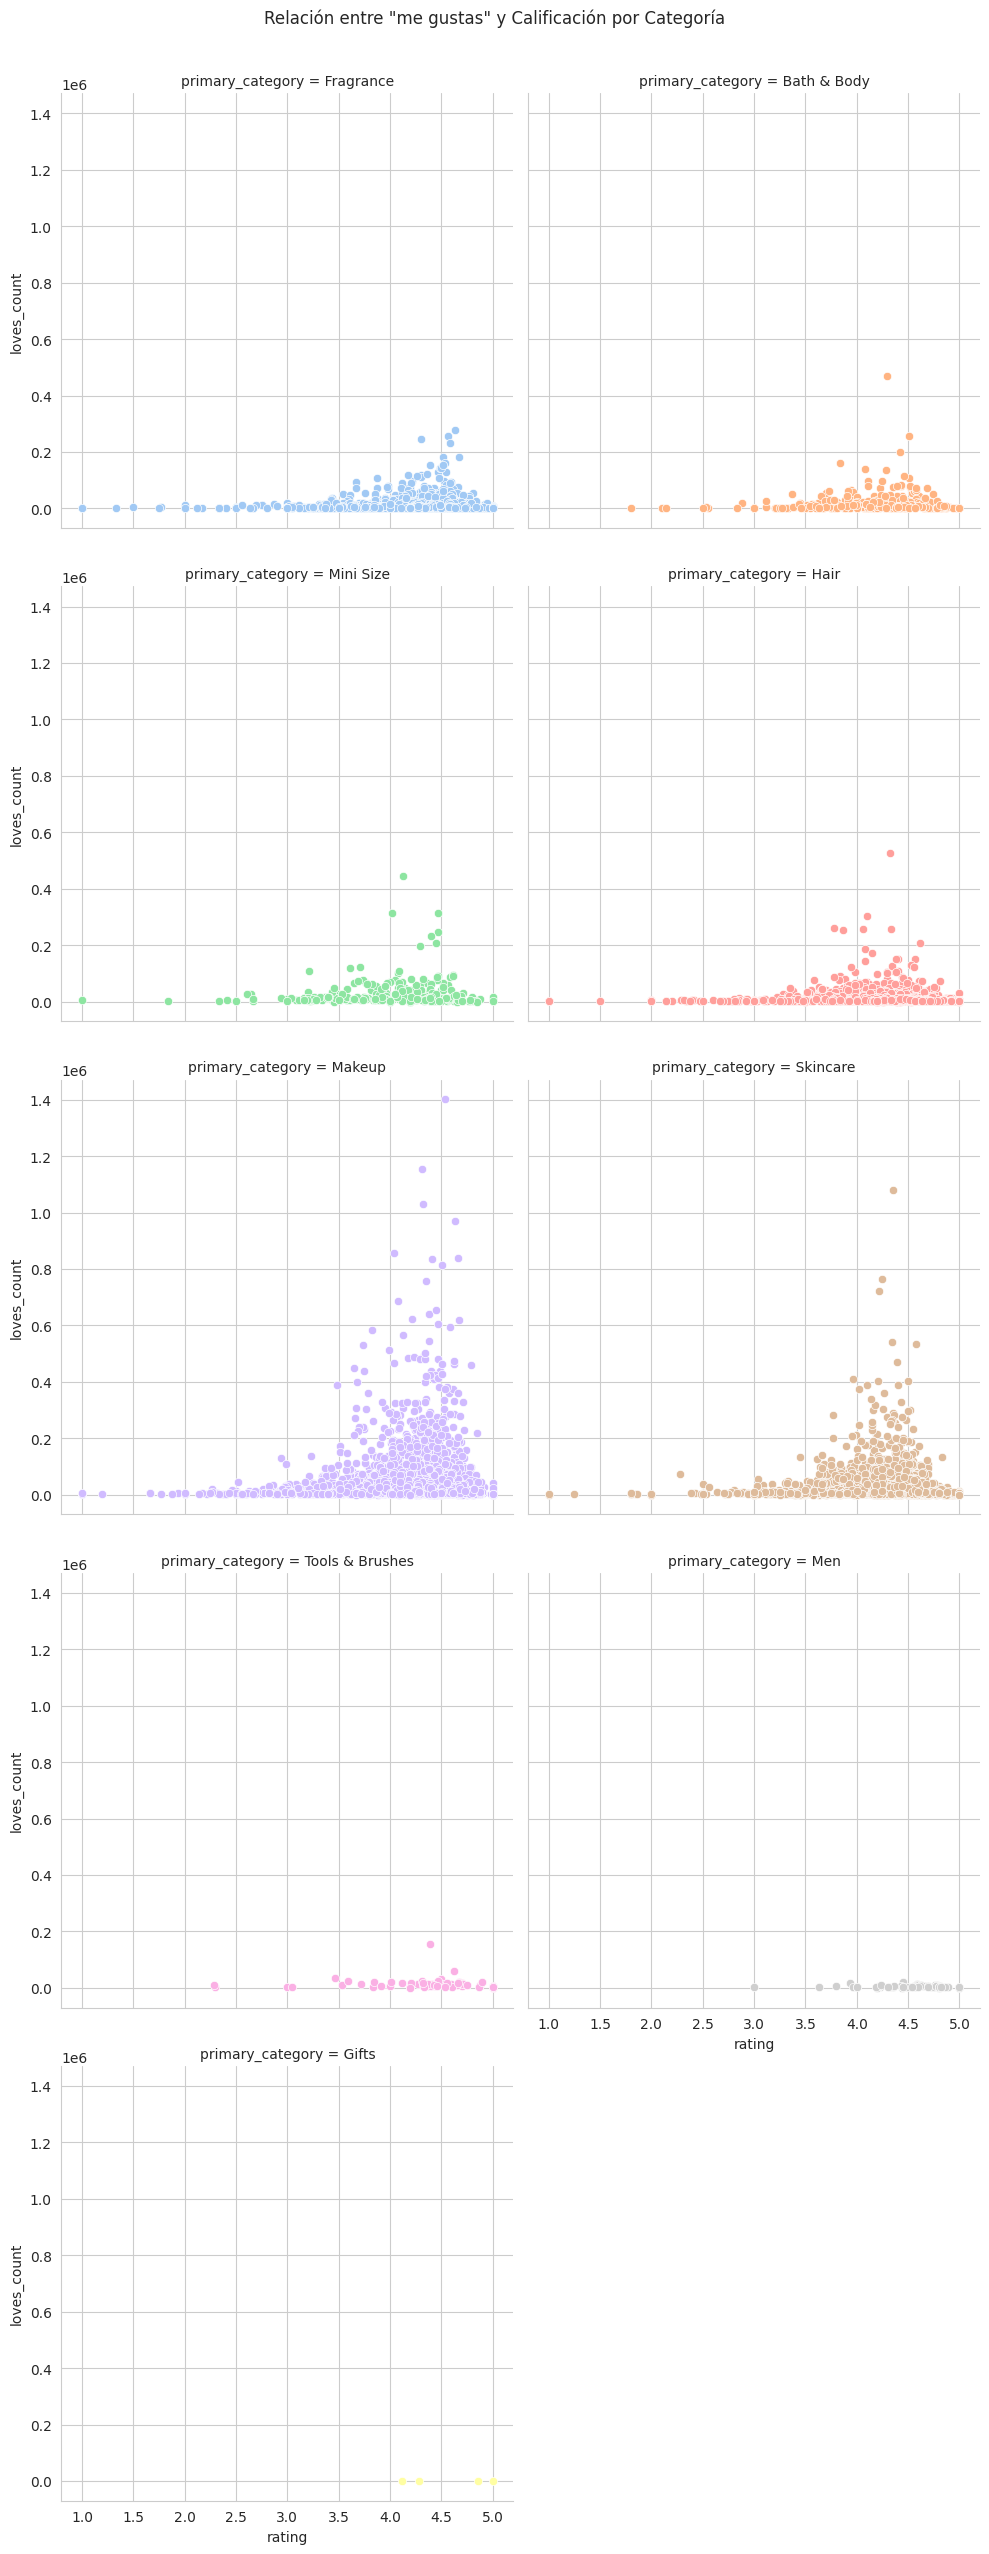

In [1040]:
# Creo un gráfico FacetGrid
facet = sns.FacetGrid(maqui, col="primary_category", col_wrap=2, height=5, hue="primary_category", palette="pastel")

# Mapa de dispersión para la relación entre precio y calificación en cada categoría
facet.map(sns.scatterplot, 'rating', 'loves_count')

# Añadir título al gráfico principal
facet.fig.suptitle('Relación entre "me gustas" y Calificación por Categoría', y=1.02)

# Mostrar el gráfico
plt.show()

Al igual que el gráfico analizado previamente, un producto de mayor rating tiene mayor cantidad de "likes" o "me gusta" en la página.

---------------------------

## - La exclusividad de productos en la tienda

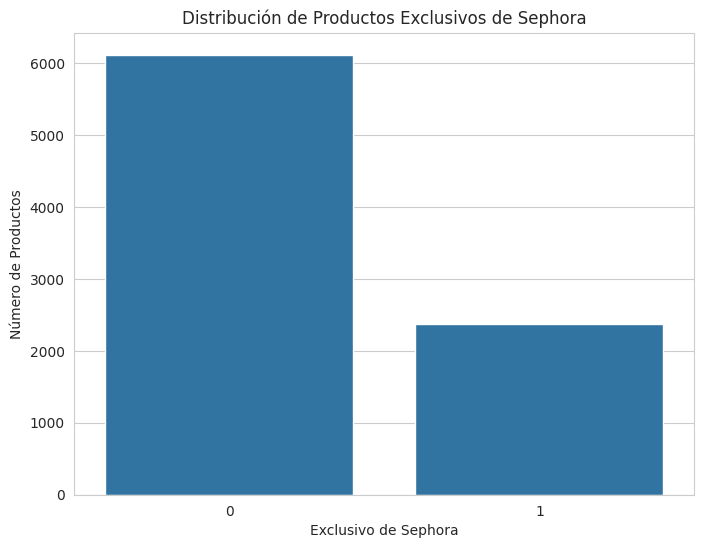

In [1041]:
# Gráfico de barras para la distribución de productos exclusivos y no exclusivos
plt.figure(figsize=(8, 6))
sns.countplot(x='sephora_exclusive', data=maqui)
plt.title('Distribución de Productos Exclusivos de Sephora')
plt.xlabel('Exclusivo de Sephora')
plt.ylabel('Número de Productos')
plt.show()

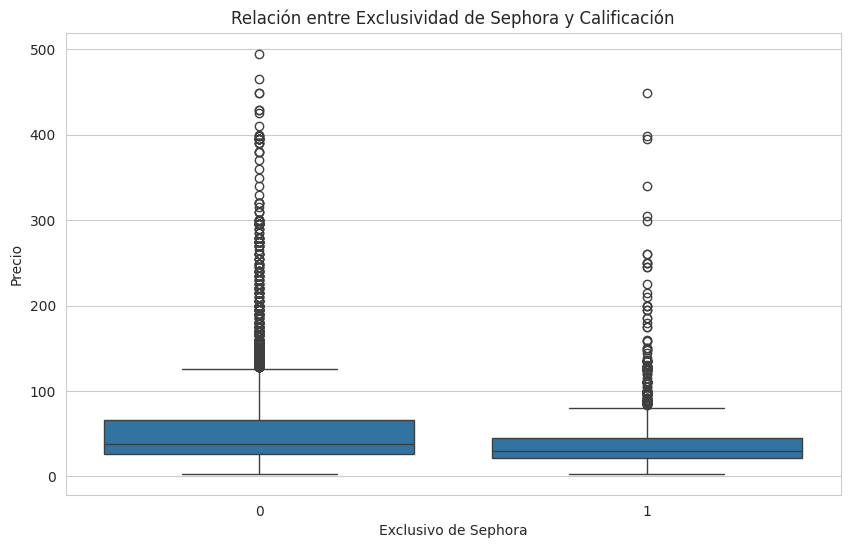

In [1042]:
# Gráfico de caja para visualizar la relación entre exclusividad de Sephora y calificación
plt.figure(figsize=(10, 6))
sns.boxplot(x='sephora_exclusive', y='price_usd', data=maqui)
plt.title('Relación entre Exclusividad de Sephora y Calificación')
plt.xlabel('Exclusivo de Sephora')
plt.ylabel('Precio')
plt.show()

Se observa con estos dos ultimos gráficos que la diferencia entre ellos es muy baja por lo que la exclusividad no será significativa en cuanto a su impacto en el precio.

# D) Modelado

In [1043]:
# Se busco utilizar esta formula para eliminar los outliers, pero impacto negativamente en los resultados.
'''def outliers(data,feature):
    q1 = data[feature].quantile(0.25)
    q3 = data[feature].quantile(0.75)
    iqr = q3 - q1

    lower_limit = q1 - iqr *1.5
    upper_limit = q3 + iqr *1.5

    ls = data.index[(data[feature]<lower_limit) | (data[feature]>upper_limit)]

    return ls

#Y otra función para que remueva los valores que estan por encima y por debajo de esos limites. Como parametros va a tomar el dataframe y el ls calculado anteriormente
def remove(maqui,ls):
    ls = sorted(set(ls))
    maqui = maqui.drop(ls)
    return maqui'''

'def outliers(data,feature):\n    q1 = data[feature].quantile(0.25)\n    q3 = data[feature].quantile(0.75)\n    iqr = q3 - q1\n\n    lower_limit = q1 - iqr *1.5\n    upper_limit = q3 + iqr *1.5\n\n    ls = data.index[(data[feature]<lower_limit) | (data[feature]>upper_limit)]\n\n    return ls\n\n#Y otra función para que remueva los valores que estan por encima y por debajo de esos limites. Como parametros va a tomar el dataframe y el ls calculado anteriormente\ndef remove(maqui,ls):\n    ls = sorted(set(ls))\n    maqui = maqui.drop(ls)\n    return maqui'

In [1044]:
#obtención de outliers
'''index_list_global = []
index_list_global.extend(outliers(maqui,'price_usd'))'''

"index_list_global = []\nindex_list_global.extend(outliers(maqui,'price_usd'))"

In [1045]:
#Borramos dicho outliers y los asigno a una nueva variable que va a almacenar nuestro dataset limpio
'''maqui = remove(maqui,index_list_global)'''

'maqui = remove(maqui,index_list_global)'

In [1046]:
#Dropeo aquellas columnas que no se tomarán en cuenta
maqui.drop(["product_id", "brand_id", "child_max_price", "child_min_price", "child_count", "sale_price_usd", "value_price_usd", "variation_desc"], axis="columns", inplace=True)

In [1047]:
#Aplico Label enconder a aquellas columnas que son de tipo "object", creo variable COLUMN
column=["size","variation_value","variation_type","primary_category", "secondary_category", "tertiary_category", "highlights", "ingredients", "brand_name", "product_name"]
maqui[column] = maqui[column].apply(LabelEncoder().fit_transform)

In [1048]:
#Ahora no figuran valores nulos y se dropearon las columnas.
maqui.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8494 entries, 0 to 8493
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   product_name        8494 non-null   int64  
 1   brand_name          8494 non-null   int64  
 2   loves_count         8494 non-null   int64  
 3   rating              8494 non-null   float64
 4   reviews             8494 non-null   float64
 5   size                8494 non-null   int64  
 6   variation_type      8494 non-null   int64  
 7   variation_value     8494 non-null   int64  
 8   ingredients         8494 non-null   int64  
 9   price_usd           8494 non-null   float64
 10  limited_edition     8494 non-null   int64  
 11  new                 8494 non-null   int64  
 12  online_only         8494 non-null   int64  
 13  out_of_stock        8494 non-null   int64  
 14  sephora_exclusive   8494 non-null   int64  
 15  highlights          8494 non-null   int64  
 16  primar

In [1049]:
#Aqui visualizamos como quedarian las columnas habiendo aplicado el label enconder
maqui.head()

,product_name,brand_name,loves_count,rating,reviews,size,variation_type,variation_value,ingredients,price_usd,limited_edition,new,online_only,out_of_stock,sephora_exclusive,highlights,primary_category,secondary_category,tertiary_category
0,2645,0,6320,3.6364,11.0,2026,2,2345,2146,35.0,0,0,1,0,0,2767,1,38,100
1,3720,0,3827,4.1538,13.0,1475,6,1137,122,195.0,0,0,1,0,0,2758,1,40,99
2,6213,0,3253,4.2500,16.0,1475,6,1137,119,195.0,0,0,1,0,0,2760,1,40,99
3,3655,0,3018,4.4762,21.0,1475,6,1137,117,195.0,0,0,1,0,0,2758,1,40,99
4,6149,0,2691,3.2308,13.0,1475,6,1137,124,195.0,0,0,1,0,0,2760,1,40,99


Selección de variables para realizar predicciones:

In [1050]:
#Selecciono variables:
X = maqui.drop(["price_usd"],axis=1)
y = maqui["price_usd"]

In [1051]:
#Separo los datos de entrenamiento y test 70/30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=16)

print('x_train size',X_train.shape)
print('y_train size',y_train.shape)
print('x_test size',X_test.shape)
print('y_test size',y_test.shape)

x_train size (5945, 18)
y_train size (5945,)
x_test size (2549, 18)
y_test size (2549,)


In [1052]:
#Uso SRANDARDSCALER
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#Implementaré Regresión Lineal, KNN y XGB Regressor:

In [1053]:
#REGRESIÓN LINEAL
model = LinearRegression()

In [1054]:
#Entreno el modelo
model.fit(X_train, y_train)

LinearRegression()

In [1055]:
#Predecimos
y_pred = model.predict(X_test)

In [1056]:
# Metrica R2 para RL
r2_rl = r2_score(y_test, y_pred)
r2_rl


0.1704466586298693

In [1057]:
#Metrica Mean Absolute Error para RL
mae = mean_absolute_error(y_test, y_pred)
mae

27.40663510396707

In [1058]:
# Instancio modelo KNN
model = KNN(n_neighbors=10,weights="uniform",metric="manhattan")

In [1059]:
# entrenamos
model.fit(X_train, y_train)

KNeighborsRegressor(metric='manhattan', n_neighbors=10)

In [1060]:
# prediccion
y_pred = model.predict(X_test)

In [1061]:
# metrica R2 para KNN
r2_knn = r2_score(y_test, y_pred)
r2_knn

0.44932460692872733

In [1062]:
#Métrica Mean Absolite Error para KNN
mae = mean_absolute_error(y_test, y_pred)
mae

20.194033346410357

In [1063]:
# instanciamos el modelo XGBREGRESSOR
model = XGBRegressor(n_estimators= 2000 , max_depth= 7 , learning_rate = 0.01) #el mejor parametro max_depth ha sido 7

In [1064]:
#Entreno el modelo
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=2000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [1065]:
#Predigo XGBRegresor
y_pred = model.predict(X_test)

In [1066]:
#Metrica R2 predicción
r2_xgb = r2_score(y_test, y_pred)
r2_xgb

0.7134673131843774

In [1067]:
#Métrica Mean Absolite Error para XGBRegressor
mae = mean_absolute_error(y_test, y_pred)
mae

13.734773684896737

Presento los resultados

In [1068]:
print("Algoritmo Regresión Lineal " + str(round(r2_rl, 2)))
print("Algoritmo KNN " + str(round(r2_knn, 2)))
print("Algoritmo XGB " + str(round(r2_xgb, 2)))

Algoritmo Regresión Lineal 0.17
Algoritmo KNN 0.45
Algoritmo XGB 0.71


#RESULTADOS

El mejor modelo que utilizamos ha sido el XGBRegressor con un 71% de porcentaje de eficacia en las predicciones. En este caso al haber eliminado los outliers en la columna de precios (price_usd), observamos que el porcentaje de predicción fue significativamente menor, fue por ello que se decidio eliminar esa fórmula como se menciona más arriba en la funcion que hace referencia a los outliers.



# PCA

In [1069]:
maquipca = maqui.copy()
maquipca

,product_name,brand_name,loves_count,rating,reviews,size,variation_type,variation_value,ingredients,price_usd,limited_edition,new,online_only,out_of_stock,sephora_exclusive,highlights,primary_category,secondary_category,tertiary_category
0,2645,0,6320,3.636400,11.000000,2026,2,2345,2146,35.0,0,0,1,0,0,2767,1,38,100
1,3720,0,3827,4.153800,13.000000,1475,6,1137,122,195.0,0,0,1,0,0,2758,1,40,99
2,6213,0,3253,4.250000,16.000000,1475,6,1137,119,195.0,0,0,1,0,0,2760,1,40,99
3,3655,0,3018,4.476200,21.000000,1475,6,1137,117,195.0,0,0,1,0,0,2758,1,40,99
4,6149,0,2691,3.230800,13.000000,1475,6,1137,124,195.0,0,0,1,0,0,2760,1,40,99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8489,1669,281,2790,4.428600,7.000000,2026,2,2345,4418,150.0,0,0,0,0,0,0,4,12,40
8490,3689,281,2319,4.636700,556.000000,1255,6,864,512,106.0,0,0,0,0,0,2021,1,25,22
8491,5238,281,1475,5.000000,2.000000,2026,2,2345,3484,134.0,1,1,1,1,0,0,1,38,100
8492,8318,281,840,4.194513,448.545521,2026,2,2345,681,167.0,1,1,1,0,0,0,1,38,23


In [1070]:
#Selecciono variables:
X2 = maquipca.drop(["price_usd"],axis=1)
y2 = maquipca["price_usd"]

In [1071]:
#Separo los datos de entrenamiento y test 70/30
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.30, random_state=16)

print('x2_train size',X2_train.shape)
print('y2_train size',y2_train.shape)
print('x2_test size',X2_test.shape)
print('y2_test size',y2_test.shape)

x2_train size (5945, 18)
y2_train size (5945,)
x2_test size (2549, 18)
y2_test size (2549,)


In [1072]:
#Uso SRANDARDSCALER
sc = StandardScaler()
X2_train = sc.fit_transform(X2_train)
X2_test = sc.transform(X2_test)

In [1073]:
pca = PCA()
X2_train = pca.fit_transform(X2_train)
X2_test = pca.transform(X2_test)

In [1074]:
# Explicación de la varianza de las componentes
varianza = pca.explained_variance_ratio_
varianza

array([0.12059533, 0.11014013, 0.08103436, 0.07573964, 0.07007428,
       0.06029566, 0.05748655, 0.05535482, 0.05140103, 0.05064611,
       0.04787576, 0.0454085 , 0.04370922, 0.03822442, 0.03598305,
       0.02881311, 0.01764898, 0.00956905])

Se utilizarán los primeros 08 componentes que abarcan desde el 0.12 al 0.55, los cuales abarcan el 65% de varianza de los datos. A continuación veremos como estos impactan en los resultados.

In [1075]:
pca = PCA(n_components=8)
X2_train = pca.fit_transform(X2_train)
X2_test = pca.transform(X2_test)

Regresión Lineal PCA

In [1076]:
lr_2 = LinearRegression()

In [1077]:
lr_2.fit(X2_train, y2_train)

LinearRegression()

In [1078]:
y2_pred = lr_2.predict(X2_test)

In [1079]:
#Metrica R2
r2_rl_2 = r2_score(y2_test, y2_pred)
r2_rl_2

0.1405409721347778

KNN

In [1080]:
knn2 = KNN(n_neighbors=10,weights="uniform",metric="manhattan")

In [1081]:
# Entreno el modelo
knn2.fit(X2_train, y2_train)

KNeighborsRegressor(metric='manhattan', n_neighbors=10)

In [1082]:
# Predigo KNN
y2_pred = knn2.predict(X2_test)

In [1083]:
# metrica R2
r2_knn2 = r2_score(y2_test, y2_pred)
r2_knn2

0.2775409704720926

XGBRegressor

In [1084]:
xgb2 = XGBRegressor(n_estimators= 2000 , max_depth= 7, learning_rate = 0.01)

In [1085]:
xgb2.fit(X2_train, y2_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=2000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [1086]:
y2_pred = xgb2.predict(X2_test)

In [1087]:
#Metrica R2 predicción
r2_xgb2 = r2_score(y2_test, y2_pred)
r2_xgb2

0.30762483006559227

# Conclusión

Al aplicar PCA se observa que el rendimiento pudo haber empeorado debido a pérdida de información relevante,
excesiva reducción de dimensionalidad o estar eliminando información crucial.
Al aplicar los modelos se observo que el mejor resultado los presento el modelo XGBREGRESSOR con un 30% de eficacia.

Sin embargo los mejores resultados se han obtenido previamente a la implementacion de PCA, siendo XGBREGRESSOR el modelo optimo con un 71% de eficacia.

Habiendo obtenido estos resultados, se concluye que con información como las categorias, las valoraciones, la exclusividad e incluso considerando los ingredientes, se puede llegar a predecir el precio de venta de un producto para esta cadena de cosméticos con una alta efectividad.